# IN-STK5000 - Medical project
#### Group 9: Anette Fredriksen, Adrian Eriksen and Maren Aamodt

## Part 1: Historical data
For part one, we are going to study the historical data set. 

In the dataset we have $x_1$ referring to the gender, 0 or 1.

$x_2$ refers to smoking, and we are assuming that $x_2 = 0$ means the person is a non-smoker, and $x_2=1$ means the person smokes.

The rest of the hisorical dataset is $x_{3:128}$ referring to the gene data, and $x_{129:130}$ referring to the symptoms.

In [91]:
#Importing necessary packages:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [5]:
features = pandas.read_csv('../../data/medical/historical_X.dat', header=None, sep=" ").values
#actions = pandas.read_csv('../../data/medical/historical_A.dat', header=None, sep=" ").values
#outcome = pandas.read_csv('../../data/medical/historical_Y.dat', header=None, sep=" ").values

In [7]:
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

In [282]:
df_obs = pandas.DataFrame(observations)
#df_obs.head()

ValueError: invalid literal for int() with base 10: 'Sex'

### The distributions of sex and smokers

Firstly, we take a closer look at the two first features, $x_1$, sex, and $x_2$, smoker, and how they are distributed in the historical data.

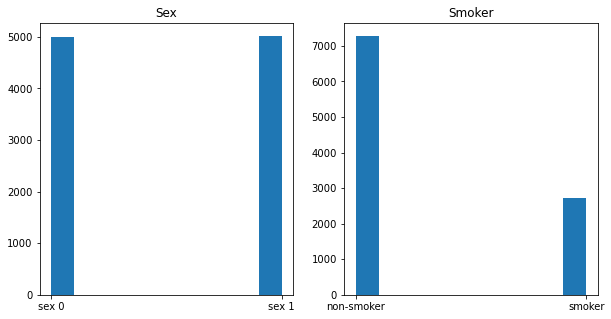

In [291]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(["sex 0", "sex 1"])
axs[0].hist(df_obs[0])
axs[0].set_title("Sex")

axs[1].set_xticks([0,1])
axs[1].set_xticklabels(["non-smoker", "smoker"])
axs[1].hist(df_obs[1])
axs[1].set_title("Smoker")

plt.show()

From the histograms, we can see that the observations seems to be equally distributed when it comes to gender.
Furtheron, we can see that there are far less smokers than non-smokers in the dataset.

Also, it would be interesting to see if there is any differences between the genders when it comes to smoking. Therefore we are plotting histograms of non-smokers and smokers given a certain gender. 

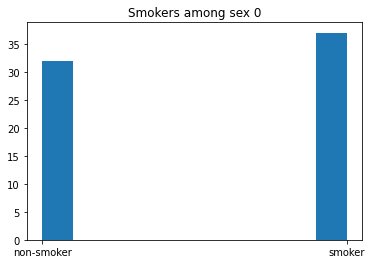

In [90]:
fig,ax = plt.subplots()
ax.hist(observations[1][observations[0] == 0])
ax.set_title("Smokers among sex 0")

ax.set_xticks([0,1])
ax.set_xticklabels(["non-smoker", "smoker"])
plt.show()

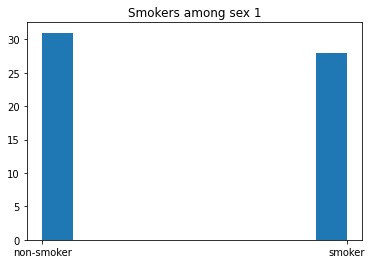

In [89]:
fig,ax = plt.subplots()
ax.hist(observations[1][observations[0] == 1])
ax.set_title("Smokers among sex 1")

ax.set_xticks([0,1])
ax.set_xticklabels(["non-smoker", "smoker"])
plt.show()

Intrestingly, it seems to be fewer smokers among "sex 1".

### Gene distributions
Next, we take a look at the distributions of $x_{3:128}$, e.g. the gene observations. Since all the genes are represented as 0 or 1, which we interpret to meaning abcence or precence of gene, it is hard to visualize in a good way. 

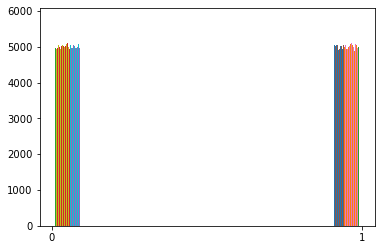

In [75]:
fig, ax = plt.subplots()
ax.hist(observations[:,2:128])
ax.set_xticks([0,1])

plt.show()

The first plot is a histogram of all the 128 genes' value. What we can see, is that the ratio of precence and abcence of genes seems to be pretty equal for all genes.

To see the distribution clearer, we are also making a scatter plot of the sum of observations where a certain gene (from $x_3$ to $x_{128}$) is present (e.g. $x_i=1$). 

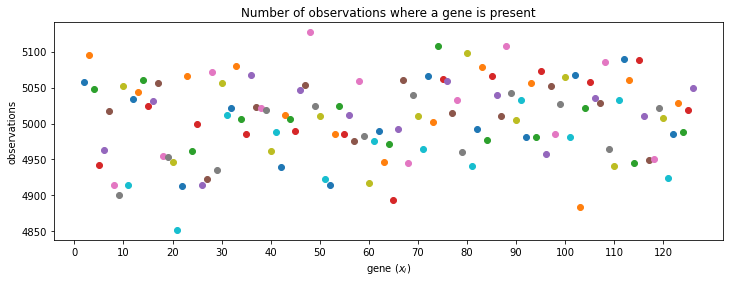

In [293]:
fig, ax = plt.subplots(figsize=(12,4))
for i in range(2,127):
    ax.scatter(i, sum(df_obs[i]==1))
    
ax.set_xlabel("gene ($x_i$)")
ax.set_xticks(np.arange(0,128,10))

ax.set_title("Number of observations where a gene is present")
ax.set_ylabel("observations")
plt.show()

### Clustering with K-means
Using K-means to find clusters in the historical data.

In [202]:
#Finding optimal number of clusters:
elbows_score = np.zeros(21) 

for k in range(1,21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(observations)

    # Sum of distances of samples to their closest cluster center.
    interia = kmeans_model.inertia_
    
    elbows_score[k] = -kmeans_model.score(observations)/k
    
    #print("k = %2d: Interia = %f   Score = %f   Elbow = %f" % (k,interia,kmeans_model.score(observations), interia/k))

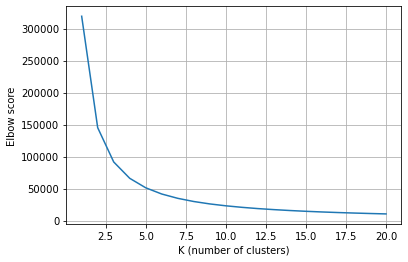

In [295]:
#Plotting the elbow score:
fig, ax = plt.subplots()
ax.plot(range(1,21), elbows_score[1:21])
ax.set_xlabel('K (number of clusters)')
ax.set_ylabel('Elbow score')
ax.grid()
plt.show()

When looking at the elbow score in the plot above, the threshold seems to be at $K=5$.

In [316]:
K = 2
kmeans_model = KMeans(n_clusters=K, random_state=1).fit(df_obs)
df_obs["clusters"] = pandas.DataFrame(kmeans_model.labels_)

for k in range(K):
    print("Nr of observations in cluster %d: %d" %(k,sum(kmeans_model.labels_ == k)))

Nr of observations in cluster 0: 4920
Nr of observations in cluster 1: 5080


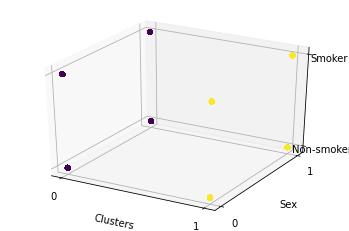

In [317]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df_obs["clusters"],df_obs[0],df_obs[1], c=df_obs["clusters"])

ax.set_xlabel("Clusters")
ax.set_xticks(range(K))

ax.set_ylabel("Sex")
#ax.set_zlabel("Smoker")

ax.set_yticks([0,1])

ax.set_zticks([0,1])
ax.set_zticklabels(["Non-smoker", "Smoker"])

plt.show()

*From what I can see, the clusters make no sense. Maybe it makes more sense with all the gene observations..?*

### The symptoms in the historical dataset

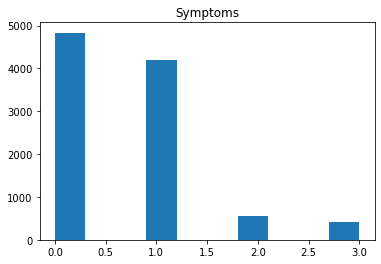

In [319]:
plt.hist(labels)
plt.title("Symptoms")
plt.show()

In [320]:
# Checking symptoms in the clusterings:
obs_0 = df_obs[df_obs["clusters"] == 0]
obs_1 = df_obs[df_obs["clusters"] == 1]

lab_0 = labels[kmeans_model.labels_ == 0]
lab_1 = labels[kmeans_model.labels_ == 1]

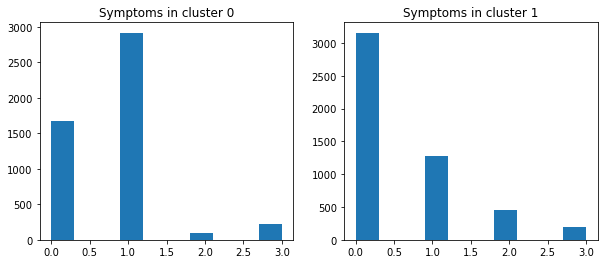

In [328]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].set_title("Symptoms in cluster 0")
axs[0].hist(lab_0)

axs[1].set_title("Symptoms in cluster 1")
axs[1].hist(lab_1)

plt.show()